In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(12,6)})
SEED = 2022

In [4]:
milk_dataset = pd.read_csv("milknew.csv")

In [5]:
milk_dataset.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [6]:
milk_dataset.columns


Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [7]:

milk_dataset = milk_dataset.rename(columns={"Fat ": "Fat"})

In [8]:
milk_dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [9]:
milk_dataset.iloc[:,:-1]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    milk_dataset.iloc[:,:-1], 
    milk_dataset.iloc[:,-1],
    test_size = 0.2,
    random_state = SEED
)

## Visualise main features and output distribution

<AxesSubplot:xlabel='Temprature', ylabel='Count'>

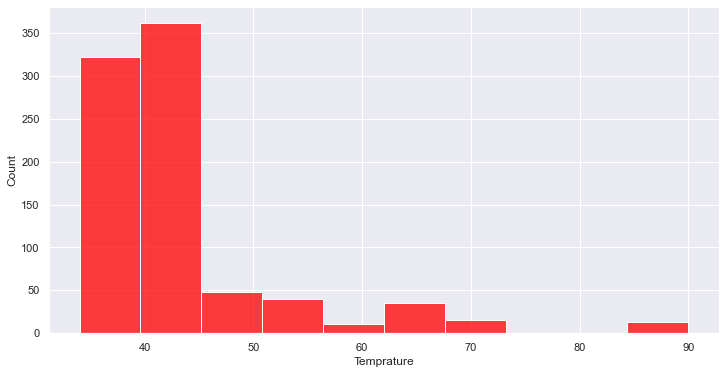

In [11]:
sns.histplot(
    data=X_train, 
    x="Temprature", 
    bins=10, 
    color="red"
)

<AxesSubplot:xlabel='pH', ylabel='Count'>

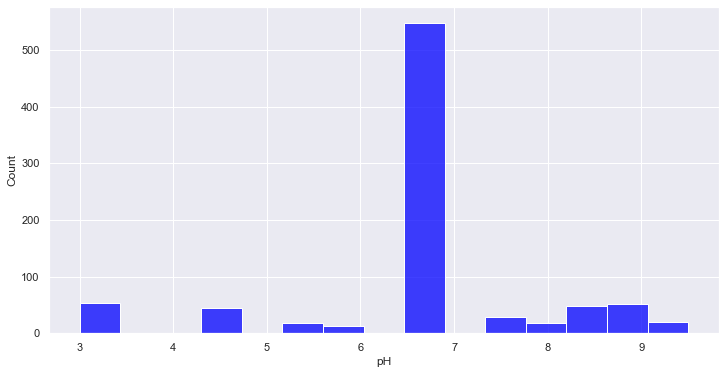

In [12]:
sns.histplot(
    data=X_train, 
    x="pH", 
    bins=15,
    color="blue"
)

<AxesSubplot:xlabel='Colour', ylabel='Count'>

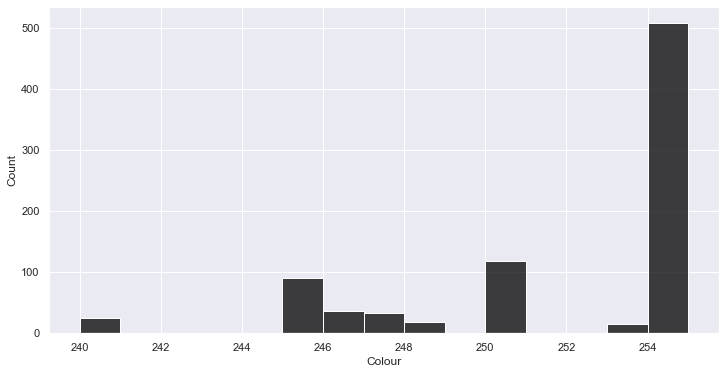

In [13]:
sns.histplot(
    data=X_train, 
    x="Colour", 
    bins=15,
    color="black"
)

<AxesSubplot:xlabel='Grade', ylabel='Count'>

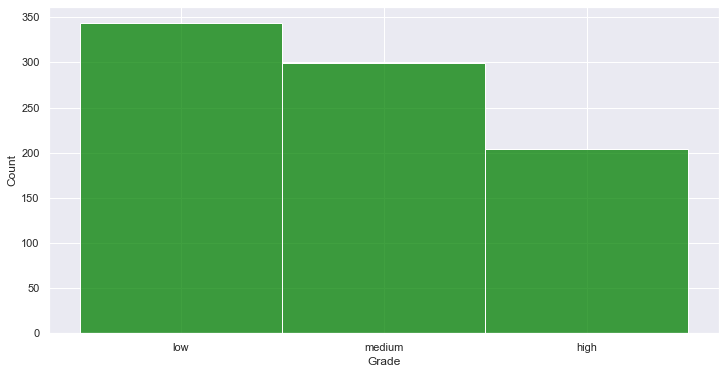

In [14]:
sns.histplot(
    data=y_train, 
    bins=15,
    color="green",
    discrete=True
)

## Preprocess data

In [16]:
numerical_features = ["pH", "Temprature", "Colour"]
categorical_features = ["Taste", "Odor", "Fat", "Turbidity"]

In [17]:
numerical_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [18]:
input_pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, numerical_features),
    ("categorical", "passthrough", categorical_features)
])

In [19]:
# Using own categories order to be sure its correct
output_pipeline = Pipeline([
    ("one_hot", OrdinalEncoder(categories=[["low", "medium", "high"]]))
])

In [20]:
X_train_transformed = input_pipeline.fit_transform(X_train)
X_test_transformed = input_pipeline.transform(X_test)

In [21]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [22]:
y_train_transformed = output_pipeline.fit_transform(y_train)
y_test_transformed = output_pipeline.transform(y_test)

## Creating models and training

Logistic Regression

In [24]:
logistic_regression = LogisticRegression()

In [25]:
logistic_regression.fit(X_train_transformed, y_train_transformed.flatten())

LogisticRegression()

In [26]:
train_predicted = logistic_regression.predict(X_train_transformed)
test_predicted = logistic_regression.predict(X_test_transformed)

In [27]:
print(classification_report(y_train_transformed, train_predicted))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       344
         1.0       0.94      0.85      0.89       299
         2.0       0.73      0.84      0.78       204

    accuracy                           0.86       847
   macro avg       0.85      0.85      0.85       847
weighted avg       0.86      0.86      0.86       847



In [28]:
print(classification_report(y_test_transformed, test_predicted))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        85
         1.0       0.95      0.81      0.88        75
         2.0       0.70      0.85      0.77        52

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.86      0.84      0.85       212



## SVC

In [29]:
svc = SVC()

In [30]:
svc.fit(X_train_transformed, y_train_transformed.flatten())

SVC()

In [31]:
train_predicted = svc.predict(X_train_transformed)
test_predicted = svc.predict(X_test_transformed)

In [32]:
print(classification_report(y_train_transformed, train_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       344
         1.0       0.96      0.94      0.95       299
         2.0       0.91      0.94      0.92       204

    accuracy                           0.96       847
   macro avg       0.95      0.96      0.96       847
weighted avg       0.96      0.96      0.96       847



In [33]:
print(classification_report(y_test_transformed, test_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       0.92      0.93      0.93        75
         2.0       0.90      0.88      0.89        52

    accuracy                           0.95       212
   macro avg       0.94      0.94      0.94       212
weighted avg       0.95      0.95      0.95       212



## Random forest

In [34]:
random_forest = RandomForestClassifier(max_depth=6)

In [35]:
random_forest.fit(X_train_transformed, y_train_transformed.flatten())

RandomForestClassifier(max_depth=6)

In [36]:
train_predicted = random_forest.predict(X_train_transformed)
test_predicted = random_forest.predict(X_test_transformed)

In [37]:
print(classification_report(y_train_transformed, train_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       344
         1.0       1.00      1.00      1.00       299
         2.0       1.00      1.00      1.00       204

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847



In [38]:
print(classification_report(y_test_transformed, test_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       1.00      1.00      1.00        75
         2.0       1.00      1.00      1.00        52

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



<AxesSubplot:>

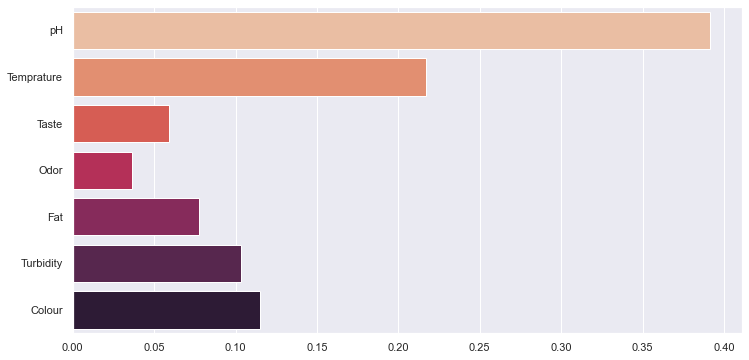

In [39]:
sns.barplot(
    y=X_train.columns, 
    x=random_forest.feature_importances_,
    palette="rocket_r"
)

## Visualise 2D features distribution and color by grade

<AxesSubplot:>

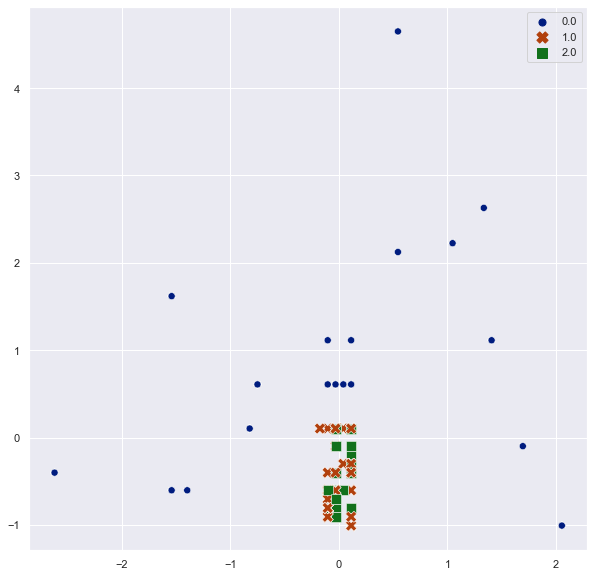

In [40]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.scatterplot(
    x=X_train_transformed[:,0], y=X_train_transformed[:,1], 
    size=y_train_transformed.flatten(), 
    sizes=(50, 200),
    hue=y_train_transformed.flatten(),
    style=y_train_transformed.flatten(),
    palette="dark",
)


In [41]:
pca = PCA(n_components=2)

In [42]:
data_2d = pca.fit_transform(X_train_transformed)

<AxesSubplot:>

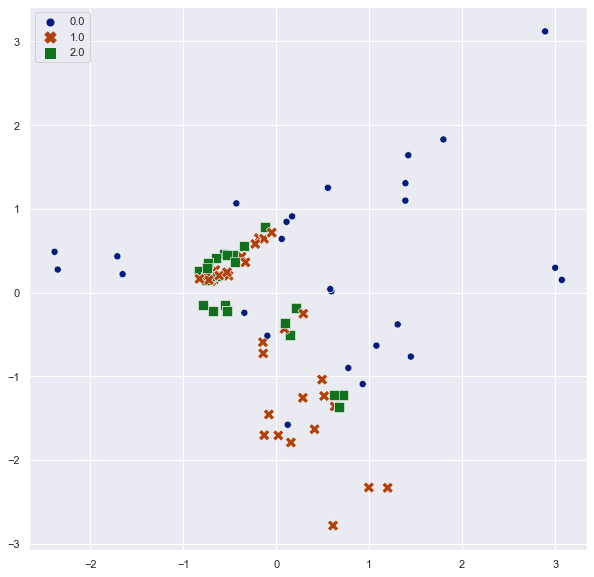

In [43]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.scatterplot(
    x=data_2d[:,0], y=data_2d[:,1], 
    size=y_train_transformed.flatten(), 
    sizes=(50, 200),
    hue=y_train_transformed.flatten(),
    style=y_train_transformed.flatten(),
    palette="dark",
)